<a href="https://colab.research.google.com/github/wikistat/High-Dimensional-Deep-Learning/blob/master/AutoEncoder/Autoencoders_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 
<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 150px; display: inline"  alt="Wikistat"/></a>
<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" width=400,  style="float:right;  display: inline" alt="IMT"/> </a>
    
</center>

# Files & Data (Google Colab)

If you're running this notebook on Google colab, you do not have access to the `solutions` folder you get by cloning the repository locally. 

The following lines will allow you to build the folders and the files you need for this TP.

**WARNING 1** Do not run this line localy.
**WARNING 2** The magic command `%load` does not work work on google colab, you will have to copy-paste the solution on the notebook.

In [1]:
! mkdir image
! wget . https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/vae_mlp_decoder.png
! wget . https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/vae_mlp_vae.png
! wget image https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/image/vae_2.svg
! wget image https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/image/vae_3.svg
! mkdir solutions
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/compare_sparsity_decoded_imgs.py
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/compare_sparsity_encoded_imgs.py
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/convolutional_autoencoder.py
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/decoded_images_both_method.py
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/decoder_vae.py
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/generate_single_sample.py
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/simple_autoencoder.py
! wget solutions https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/train_denoise_model.py

mkdir: cannot create directory ‘image’: File exists
--2022-11-02 20:48:01--  http://./
Resolving . (.)... failed: Temporary failure in name resolution.
wget: unable to resolve host address ‘.’
--2022-11-02 20:48:01--  https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/vae_mlp_decoder.png
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wikistat/High-Dimensional-Deep-Learning/master/AutoEncoder/vae_mlp_decoder.png [following]
--2022-11-02 20:48:01--  https://raw.githubusercontent.com/wikistat/High-Dimensional-Deep-Learning/master/AutoEncoder/vae_mlp_decoder.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8002::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connect

--2022-11-02 20:48:07--  http://solutions/
Resolving solutions (solutions)... failed: Temporary failure in name resolution.
wget: unable to resolve host address ‘solutions’
--2022-11-02 20:48:07--  https://github.com/wikistat/High-Dimensional-Deep-Learning/raw/master/AutoEncoder/solutions/convolutional_autoencoder.py
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wikistat/High-Dimensional-Deep-Learning/master/AutoEncoder/solutions/convolutional_autoencoder.py [following]
--2022-11-02 20:48:07--  https://raw.githubusercontent.com/wikistat/High-Dimensional-Deep-Learning/master/AutoEncoder/solutions/convolutional_autoencoder.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com

# High Dimensional & Deep Learning : Autoencoders

##  What is an Autoencoder ?

<P style="text-align:center"><img src="https://blog.keras.io/img/ae/autoencoder_schema.jpg" style="float:center; display: inline" alt="schema"/></P>
<i>Autoencoder architecture</i>

## Objective 

During this TP  we will build different autoencoders with Keras and Tensorflow. Here are the main objectives :

* Build a autoencoder based on simple perceptron layers.
* Add regularization on layers and understand its effects.
* Build a convolutional autoencoder.
* Use a convolutional autoencoder to solve denoising problems.
* Manipulate the library in order to get and observe the result at different points of the dataflow.


The dataset used all along this TP is the MNIST dataset.

## Library

In [7]:
from tensorflow.keras.datasets import mnist
import tensorflow.keras.preprocessing.image as kpi
import tensorflow.keras.models as km
import tensorflow.keras.layers as kl
import tensorflow.keras.regularizers as kr
import numpy as np

import matplotlib.pyplot as plt
import tensorflow
tensorflow.__version__

TypeError: Expected a message Descriptor, got Descriptor

## Dataset 
As we won't apply any supervised algorithm in this TP, we do not need to load the `Y` variable.

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

As seen in the previous TP, it is better to normalize the dataset before to apply algorithm on it.

(60000, 28, 28)
(10000, 28, 28)


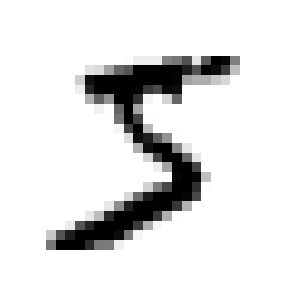

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape)
print(x_test.shape)

fig  = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
x = kpi.img_to_array(x_train[0])
ax.imshow(x[:,:,0], interpolation='nearest', cmap="binary")
ax.grid(False)
plt.axis('off')
plt.show()

## Building a simple autoencoder

We will first build a very simple architecture where :

* the **encoder layer** : is a `Dense` layer composed of 32 neurons (the latent variable) with a `Relu` activation function :
$$relu(x) = max(0,x)$$
* the **decoded layer** : is a `Dense` layer composed of  784 neurons (the input dimension) with a `Sigmoid`activation function.
$$sigmoid(x) = \frac{1}{1+\text{e}^x}$$




We first reshape the data form to be 1D.

In [5]:
x_train_flatten = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flatten = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train_flatten.shape, x_test_flatten.shape

((60000, 784), (10000, 784))

### Write the model

**Exercice** : write the simple model described above in Keras.

In [18]:
n_latent = 32
n_input = 784

autoencoder = km.Sequential(name = "simple_autoencoder")
autoencoder.add(kl.Dense(n_latent, activation='relu', input_shape=(n_input,),name="encoder_layer")) 
autoencoder.add(kl.Dense(n_input, activation='sigmoid', name = "decoder_layer" ))

autoencoder.summary()

#input_shape=(n_input,): par exemple, une shape de (30,4,10) est un tenseur de 3 dimensions qui contient
# 30 éléments dans la 1ere dimension, 4 éléménts dans la 2e dimension et 10 éléments dans la 3e dimension

Model: "simple_autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_layer (Dense)       (None, 32)                25120     
                                                                 
 decoder_layer (Dense)       (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [12]:
# %load solutions/simple_autoencoder.py

We then learn the model. Note that the target variable is the original image.

In [19]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_flatten, x_train_flatten, epochs=25, batch_size=256, validation_data=(x_test_flatten, x_test_flatten))

Epoch 1/25
235/235 [==============================] - 3s 10ms/step - loss: 0.2756 - val_loss: 0.1911
Epoch 2/25
235/235 [==============================] - 2s 10ms/step - loss: 0.1727 - val_loss: 0.1553
Epoch 3/25
235/235 [==============================] - 2s 10ms/step - loss: 0.1447 - val_loss: 0.1337
Epoch 4/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1286 - val_loss: 0.1218
Epoch 5/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1184 - val_loss: 0.1132
Epoch 6/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1110 - val_loss: 0.1067
Epoch 7/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1055 - val_loss: 0.1021
Epoch 8/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1016 - val_loss: 0.0989
Epoch 9/25
235/235 [==============================] - 2s 9ms/step - loss: 0.0989 - val_loss: 0.0966
Epoch 10/25
235/235 [==============================] - 2s 9ms/step - loss: 0.0971 - val_loss: 0.0

**Question** : We use the binary cross entropy here as in the original paper [1](https://arxiv.org/pdf/1312.6114.pdf). Does it seem an intuitive choice? Why?
How is the loss evolving during training?

La binary_crossentropy ne semble pas naturelle car on est dans le cas d'une classification multiclasse. Il serait plus naturel d'utiliser la fonction perte categorical_crossentropy. Au cours du training, la fonction perte semble stagner.

### Check outputs

We will no check how the model performs. We produce first the encoded-decoded images.

In [20]:
decoded_test_imgs = autoencoder.predict(x_test_flatten)

313/313 [==============================] - 1s 2ms/step


The following function displays both the input and the output of the autoencoder model.

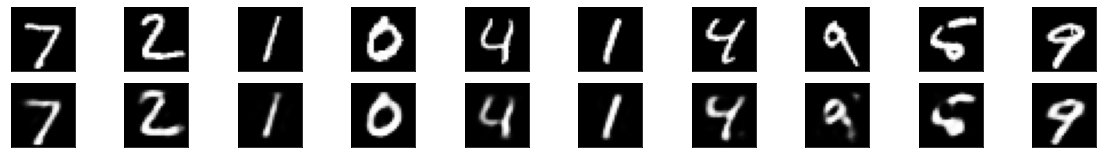

In [21]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Question** : What can you say about this results?



On remarque que en passant une image dans le système encodeur + decodeur, le décodeur parvient à retrouver l'image d'origine, mais un peu dégradée. Cela permet aussi de constater que le RN a convergé car l'image fournie par le décodeur est assez proche de l'image de départ.

### Check latent variable

The Keras model that we have written above does not allow us to retrieve the latent variables. 
In order to do so, we have to re-write the model in order to get this variable later.

We first write the encoder part.

In [22]:
encoder = km.Sequential(name="EncoderModel")
encoder.add(kl.Dense(n_latent, activation='relu', input_shape=(n_input,),name="encoder_layer"))

We then write the decoder as  another independent model

In [24]:
decoder = km.Sequential(name="DecoderModel")
decoder.add(kl.Dense(n_input, activation='sigmoid', input_shape =(n_latent,), name = "decoded_layer" ))

We finally write the autoencoder model by adding the two previous models

In [25]:
autoencoder = km.Sequential(name="EncoderDecoder")
autoencoder.add(encoder)
autoencoder.add(decoder)

The model is well composed of the association of the two previous models.

In [26]:
autoencoder.summary()

Model: "EncoderDecoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 EncoderModel (Sequential)   (None, 32)                25120     
                                                                 
 DecoderModel (Sequential)   (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


You can access the two sub models with the following syntax

In [27]:
autoencoder.get_layer("EncoderModel").summary()

Model: "EncoderModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_layer (Dense)       (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


The model can then be learned by the same way.

In [28]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_flatten, x_train_flatten, epochs=25, batch_size=256, validation_data=(x_test_flatten, x_test_flatten))

Epoch 1/25
235/235 [==============================] - 3s 9ms/step - loss: 0.2802 - val_loss: 0.1909
Epoch 2/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1707 - val_loss: 0.1524
Epoch 3/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1429 - val_loss: 0.1317
Epoch 4/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1264 - val_loss: 0.1189
Epoch 5/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1160 - val_loss: 0.1107
Epoch 6/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1092 - val_loss: 0.1052
Epoch 7/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1044 - val_loss: 0.1014
Epoch 8/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1011 - val_loss: 0.0984
Epoch 9/25
235/235 [==============================] - 2s 9ms/step - loss: 0.0987 - val_loss: 0.0965
Epoch 10/25
235/235 [==============================] - 2s 10ms/step - loss: 0.0971 - val_loss: 0.095

**Question** What can you say about the loss value of the model ? 

On remarque que la loss est la même que précédemment: nous avons bien construit le même modèle. 

We can now access and produce easily the latent variables.

In [29]:
encoded_imgs = encoder.predict(x_test_flatten)
encoded_imgs.shape

313/313 [==============================] - 0s 1ms/step


(10000, 32)

En faisant passer l'image dans l'encodeur seulement (une fois celui-ci entraîné avec le décodeur), on obtient le code qui correspond à une représentation réduite des images d'origine. 

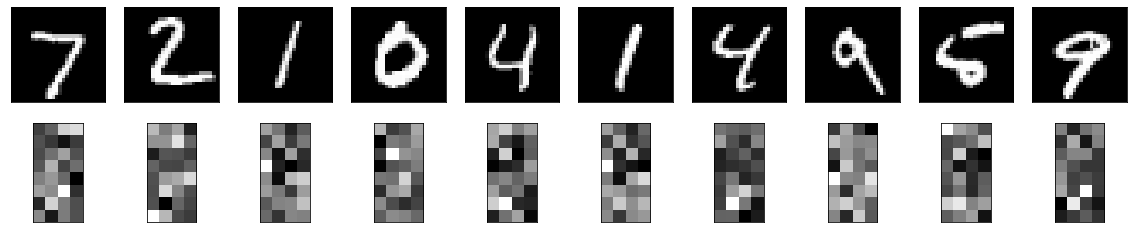

In [30]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded imgs
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

You can produce the decoded images by :
* Using the decoded part on the encoded images.
* Using the whole architecture on the original image.

**Exercise** : Check that both methods produce the same results.

In [55]:
# méthode 1: en appliquant le décodeur sur la sortie de l'encodeur que l'on vient d'obtenir 
decoded_test_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


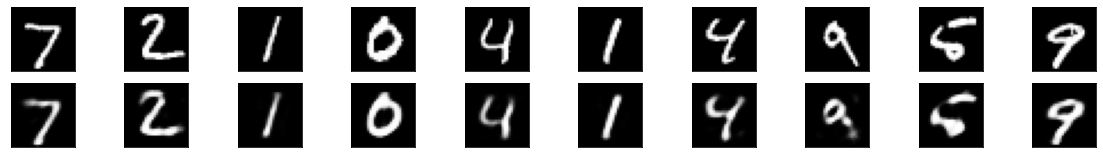

In [36]:
# Affichage des images reconstruites
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [37]:
# méthode 2: en utilisant toute l'architecture
decoded_test_imgs = autoencoder.predict(x_test_flatten)

313/313 [==============================] - 1s 2ms/step


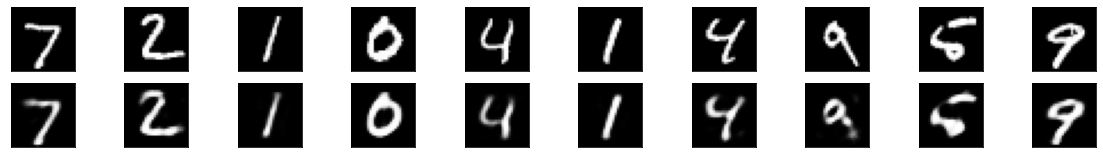

In [38]:
# Affichage des images reconstruites
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# %load solutions/decoded_images_both_method.py

## Sparse autoencoder

In the previous example the autoencoder is only constrained by the size of the hidden layer. 

In the following figure you can see the distribution of the number of latent variables set to zero for the 10.000 test images.

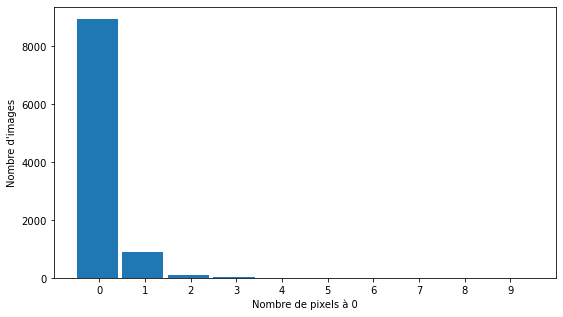

In [41]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(1,1,1)
ax.hist(np.sum(encoded_imgs==0,axis=1), width=0.9, bins=np.arange(-0.5,10.5,1))
ax.set_xticks(np.arange(10))
ax.set_xlabel('Nombre de pixels à 0')
ax.set_ylabel("Nombre d'images")
plt.show()

Le graphique ci-dessus présente des images issues du code. On observe qu'il y a + de 8000 images issues du code qui n'ont aucun pixels à 0 et 1000 images issues du code qui ont un pixel qui vaut 0. Donc notre code n'est pas très sparse. 

Another way to get a sparser encoded representation of the images is to add a *sparsity constraint* on the activity function of the hidden layer. 

Regularizers enable to avoid overfitting by adding some constraint on the weights we want to control. 

Cost function = Loss (say, binary cross-entropy) + Regularization term 

Cost function = Loss + $\lambda$ $\sum w$, where in our case $\lambda = 10e-5$ and $w$ are the weights of the encoder model.

In [42]:
l = 10e-5 #valeur de lambda

sparse_encoder = km.Sequential(name="SparseEncoderModel")
sparse_encoder.add(kl.Dense(n_latent, activation='relu', input_shape=(n_input,), activity_regularizer=kr.l1(l) ,name="encoder_layer"))
# activity_regularizer=kr.l1(l) ajoute une pénalité de type l1 dans la partie encodeur.

sparse_decoder = km.Sequential(name="SparseDecoderModel")
sparse_decoder.add(kl.Dense(n_input, activation='sigmoid', input_shape =(n_latent,), name = "decoded_layer" ))

sparse_autoencoder = km.Sequential(name="SparseEncoderDecoder")
sparse_autoencoder.add(sparse_encoder)
sparse_autoencoder.add(sparse_decoder)


We can now train the model as previously.

In [43]:
sparse_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
sparse_autoencoder.fit(x_train_flatten, x_train_flatten, epochs=25, batch_size=256,validation_data=(x_test_flatten, x_test_flatten))

Epoch 1/25
235/235 [==============================] - 3s 12ms/step - loss: 0.2869 - val_loss: 0.2012
Epoch 2/25
235/235 [==============================] - 2s 10ms/step - loss: 0.1821 - val_loss: 0.1643
Epoch 3/25
235/235 [==============================] - 2s 10ms/step - loss: 0.1551 - val_loss: 0.1447
Epoch 4/25
235/235 [==============================] - 2s 10ms/step - loss: 0.1396 - val_loss: 0.1317
Epoch 5/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1287 - val_loss: 0.1235
Epoch 6/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1218 - val_loss: 0.1176
Epoch 7/25
235/235 [==============================] - 2s 10ms/step - loss: 0.1167 - val_loss: 0.1133
Epoch 8/25
235/235 [==============================] - 2s 10ms/step - loss: 0.1131 - val_loss: 0.1104
Epoch 9/25
235/235 [==============================] - 2s 10ms/step - loss: 0.1106 - val_loss: 0.1083
Epoch 10/25
235/235 [==============================] - 2s 10ms/step - loss: 0.1089 - val_loss

**Question** : What can you say on the loss function compared with the previous model?

On remarque que à partir d'une dizaine d'epochs, la val_loss se stabilise autour de 0.10.

**Exercise**  : Check that the encoded images obtained with the sparse autoencoder are indeed sparser than the ones obtained by the first autoencoder. 

In [50]:
sparse_encoded_test_imgs = sparse_encoder.predict(x_test_flatten)

313/313 [==============================] - 0s 1ms/step


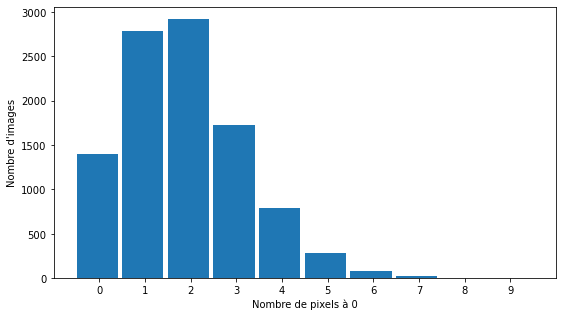

In [51]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(1,1,1)
ax.hist(np.sum(sparse_encoded_test_imgs==0,axis=1), width=0.9, bins=np.arange(-0.5,10.5,1))
ax.set_xticks(np.arange(10))
ax.set_xlabel('Nombre de pixels à 0')
ax.set_ylabel("Nombre d'images")
plt.show()

On voit avec ce graphe qu'il y a davantage de pixels qui sont mis à 0 par rapport à précédemment. La régularisation a donc fonctionné. On remarque aussi que la distribution est gaussienne de moyenne autour de 2.

In [ ]:
# %load solutions/compare_sparsity_encoded_imgs.py

**Exercise** : Compare the decoded images obtained by the first and the sparse model.

In [52]:
sparse_decoded_test_imgs = sparse_autoencoder.predict(x_test_flatten)

313/313 [==============================] - 1s 2ms/step


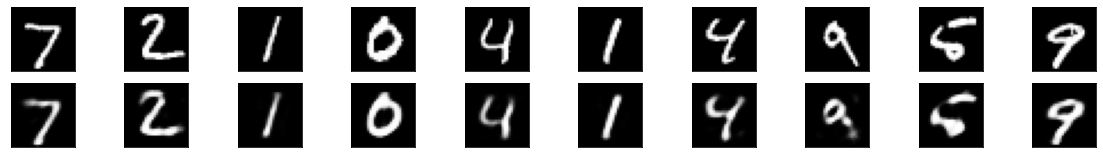

In [56]:
# Affichage des images reconstruites SANS sparsité
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

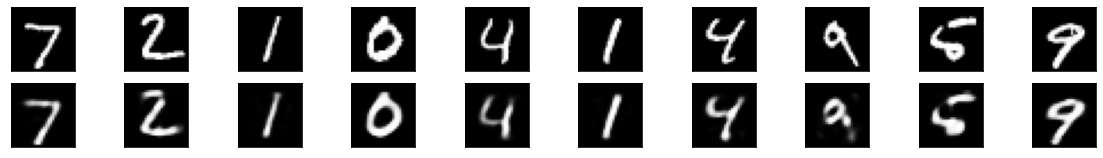

In [57]:
# Affichage des images reconstruites AVEC sparsité
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(sparse_decoded_test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

On remarque qu'il n'y a peu de différence entre les images tests lorsqu'on applique la régularisation l1. 

In [ ]:
# %load solutions/compare_sparsity_decoded_imgs.py

## Convolutional Autoencoder

In the previous part, we have seen very simple autoencoders where both encoder and decoder parts are composed of a single layer. They both can be composed of more layers (deep autoencoder) and with differents types of layers.

As seen in the previous TP, convolutional layers are the best layers to use when dealing with images. 

**Exercise** : Implement a convolutional Autoencoder with the following architecture: 

`Encoder`
* A 2d convolutional layer, 16 filters of size 3x3
* A 2Dmaxpooling layer with filters of size 2x2
* A 2d convolutial layer, 8 filters of size 3x3
* A 2Dmaxpooling layer with filters of size 2x2
* A 2d convolutial layer, 8 filters of size 3x3
* A 2Dmaxpooling layer with filters of size 2x2

`Decoder`
* A 2d convolutional layer, 8 filters of size 3x3
* A 2Dupsampling layer with filters of size 2x2
* A 2d convolutional layer, 8 filters of size 3x3
* A 2Dupsampling layer with filters of size 2x2
* A 2d convolutional layer, 16 filters of size 3x3
* A 2Dupsampling layer with filters of size 2x2
* A 2d convolutional layer, 1 filters of size 3x3, with SIGMOID activation


*All padding are `SAME` padding and all convolutional activation function but last are `RELU`*



In [88]:
x_train_conv = np.expand_dims(x_train, axis=-1) #ajoute une 4e dimension 
x_test_conv = np.expand_dims(x_test, axis=-1)

img_width = 28
img_height = 28

In [3]:
img_width = 28
img_height = 28

In [4]:
conv_encoder = km.Sequential(name='conv_encoder')
conv_encoder.add(kl.Conv2D(16, (3, 3), input_shape=(img_width, img_height,1), padding = 'same'))
conv_encoder.add(kl.Activation('relu'))
conv_encoder.add(kl.MaxPooling2D(pool_size=(2, 2), padding = 'same'))

conv_encoder.add(kl.Conv2D(8, (3, 3), padding = 'same'))
conv_encoder.add(kl.Activation('relu'))
conv_encoder.add(kl.MaxPooling2D(pool_size=(2, 2), padding = 'same'))

conv_encoder.add(kl.Conv2D(8, (3, 3), padding = 'same'))
conv_encoder.add(kl.Activation('relu'))
conv_encoder.add(kl.MaxPooling2D(pool_size=(2, 2) ,padding = 'same'))

conv_encoder.summary()

NameError: name 'km' is not defined

In [84]:
# Récupération de la taille de la sortie de l'encodeur (visuellement accessible avec encoder.summary())
output_layer = conv_decoder.layers[-1]
a = (output_layer.output_shape)[1:] #[1:] enlève le 1er élément qui est None et qui est déjà inclus dans kl.Conv2D

conv_decoder = km.Sequential(name='conv_decoder')
conv_decoder.add(kl.Conv2D(8, (3, 3), input_shape= a, padding = 'same'))
conv_decoder.add(kl.Activation('relu'))
conv_decoder.add(kl.UpSampling2D((2, 2)))

conv_decoder.add(kl.Conv2D(8, (3, 3), padding = 'same'))
conv_decoder.add(kl.Activation('relu'))
conv_decoder.add(kl.UpSampling2D((2, 2)))

conv_decoder.add(kl.Conv2D(16, (3, 3)))
conv_decoder.add(kl.Activation('relu'))
conv_decoder.add(kl.UpSampling2D((2, 2)))

conv_decoder.add(kl.Conv2D(1, (3, 3), padding = 'same'))
conv_decoder.add(kl.Activation('sigmoid'))

conv_decoder.summary()

Model: "conv_decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 activation_35 (Activation)  (None, 4, 4, 8)           0         
                                                                 
 up_sampling2d_10 (UpSamplin  (None, 8, 8, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 8, 8, 8)           584       
                                                                 
 activation_36 (Activation)  (None, 8, 8, 8)           0         
                                                                 
 up_sampling2d_11 (UpSamplin  (None, 16, 16, 8)        0         
 g2D)                                                 

In [ ]:
# %load solutions/convolutional_autoencoder.py

In [85]:
conv_autoencoder = km.Sequential(name="ConvAutoencoderModel")
conv_autoencoder.add(conv_encoder)
conv_autoencoder.add(conv_decoder)
conv_autoencoder.summary()

Model: "ConvAutoencoderModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_encoder (Sequential)   (None, 4, 4, 8)           1904      
                                                                 
 conv_decoder (Sequential)   (None, 28, 28, 1)         2481      
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [91]:
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
conv_autoencoder.fit(x_train_conv, x_train_conv, epochs=10, batch_size=256, validation_data=(x_test_conv, x_test_conv))
# ici on a model.fit(x,y) avec x = y = x_train_conv

Epoch 1/10
235/235 [==============================] - 51s 213ms/step - loss: 0.2639 - val_loss: 0.1729
Epoch 2/10
235/235 [==============================] - 48s 205ms/step - loss: 0.1575 - val_loss: 0.1446
Epoch 3/10
235/235 [==============================] - 48s 205ms/step - loss: 0.1395 - val_loss: 0.1326
Epoch 4/10
235/235 [==============================] - 47s 201ms/step - loss: 0.1298 - val_loss: 0.1248
Epoch 5/10
235/235 [==============================] - 47s 201ms/step - loss: 0.1237 - val_loss: 0.1199
Epoch 6/10
235/235 [==============================] - 47s 202ms/step - loss: 0.1196 - val_loss: 0.1167
Epoch 7/10
235/235 [==============================] - 48s 202ms/step - loss: 0.1165 - val_loss: 0.1137
Epoch 8/10
235/235 [==============================] - 48s 203ms/step - loss: 0.1139 - val_loss: 0.1115
Epoch 9/10
235/235 [==============================] - 48s 202ms/step - loss: 0.1118 - val_loss: 0.1098
Epoch 10/10
235/235 [==============================] - 47s 201ms/step - l

In [92]:
conv_autoencoder.evaluate(x_train_conv, x_train_conv)

1875/1875 [==============================] - 24s 13ms/step - loss: 0.1092


0.10922349244356155

**Question** What can you say about the loss function?

313/313 [==============================] - 4s 12ms/step


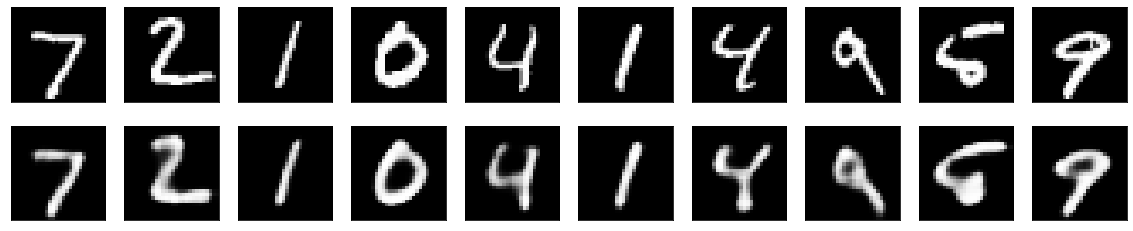

In [93]:
encoded_imgs = conv_encoder.predict(x_test_conv)
decoded_imgs = conv_autoencoder.predict(x_test_conv)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


On remarque que les images sont un peu mieux reconstruites par rapports à précédemment où on utilisait seulement des CNN. 

### Application to denoising

We now know how to build a convolutional autoencoder. 

We will now see how it can be used to solve a denoising problem. 

We first create fake noisy data.

In [94]:
# Add random noise
noise_factor = 0.5
x_train_noisy = x_train_conv + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_conv.shape) 
x_test_noisy = x_test_conv + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_conv.shape) 

# Value greater than 1 are set to 1 and value lower than 0 are set to zero
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Let's observe the noise we created.

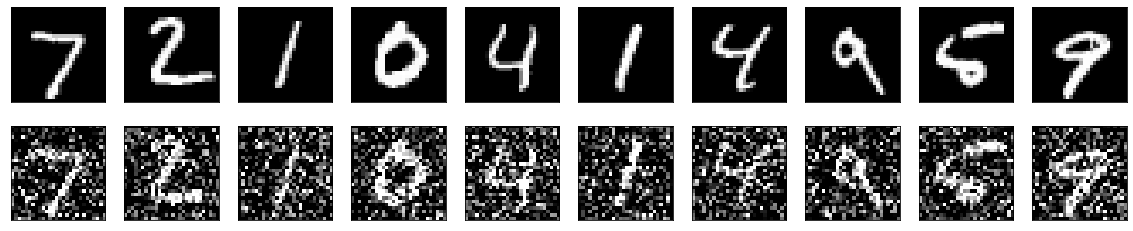

In [95]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # noisy data
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Exercise** : Now let's train the same convolutional model that we built above. But let's train this model with noisy data as an input and the original data as the output.

In [96]:
conv_autoencoder.fit(x_train_noisy, x_train_conv, epochs=10, batch_size=256, validation_data=(x_test_noisy, x_test_conv))

Epoch 1/10
235/235 [==============================] - 53s 224ms/step - loss: 0.1663 - val_loss: 0.1465
Epoch 2/10
235/235 [==============================] - 56s 236ms/step - loss: 0.1455 - val_loss: 0.1418
Epoch 3/10
235/235 [==============================] - 52s 223ms/step - loss: 0.1420 - val_loss: 0.1391
Epoch 4/10
235/235 [==============================] - 51s 216ms/step - loss: 0.1394 - val_loss: 0.1367
Epoch 5/10
235/235 [==============================] - 50s 215ms/step - loss: 0.1375 - val_loss: 0.1353
Epoch 6/10
235/235 [==============================] - 51s 217ms/step - loss: 0.1360 - val_loss: 0.1340
Epoch 7/10
235/235 [==============================] - 49s 209ms/step - loss: 0.1348 - val_loss: 0.1327
Epoch 8/10
235/235 [==============================] - 50s 214ms/step - loss: 0.1338 - val_loss: 0.1318
Epoch 9/10
235/235 [==============================] - 49s 209ms/step - loss: 0.1331 - val_loss: 0.1312
Epoch 10/10
235/235 [==============================] - 51s 217ms/step - l

In [ ]:
# %load solutions/train_denoise_model.py

Now, we pass the noisy test data into the trained autoencorder in order to denoise this data.

In [97]:
x_test_denoised = conv_autoencoder.predict(x_test_noisy)

313/313 [==============================] - 5s 15ms/step


Here are the results of the denoised data.

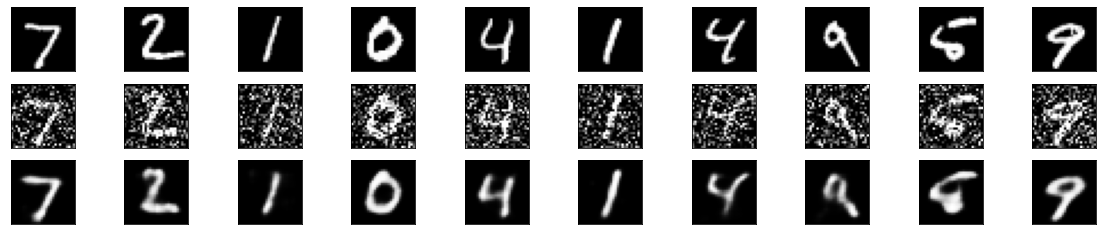

In [98]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # noisy data
    ax = plt.subplot(3, n, i + n+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # denoised data
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test_denoised[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Exercise** : Play with different architectures to decrease loss function